<a href="https://colab.research.google.com/github/HosseinEyvazi/Data-visualization/blob/main/empty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The most important viz types :


1.   bar chart : to plot the frequency of each value
2.   line chart
3.   histogram (vs bar chart : this is over interval but line chart is on EACH data point)
4.   scatter plot : to find correlation and patterns in multi-variable data . is very similar to bubble chart . can has got more dimenions (shape and color of scatters)
5.   bubble chart : has hot 2 additional dimesnions (size and color of bubbles)
6.   box plot : to highlight median , quartiles , median
7.  gantt chart : managing task and resoureces .




discretes : \
continouses :



import

In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# interactives :
import plotly.express as px
import bokeh.plotting as bp

In [184]:
! pip install ucimlrepo


# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [185]:
df = pd.DataFrame(X)
df_t = pd.DataFrame(y)
df = pd.concat([df_t , df] , axis=1) # don't forget axis =1
df.head()

,income,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,<=50K,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,<=50K,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,<=50K,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,<=50K,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,<=50K,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [186]:
df.shape

(48842, 15)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   income          48842 non-null  object
 1   age             48842 non-null  int64 
 2   workclass       47879 non-null  object
 3   fnlwgt          48842 non-null  int64 
 4   education       48842 non-null  object
 5   education-num   48842 non-null  int64 
 6   marital-status  48842 non-null  object
 7   occupation      47876 non-null  object
 8   relationship    48842 non-null  object
 9   race            48842 non-null  object
 10  sex             48842 non-null  object
 11  capital-gain    48842 non-null  int64 
 12  capital-loss    48842 non-null  int64 
 13  hours-per-week  48842 non-null  int64 
 14  native-country  48568 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [188]:
df.describe(include="all")

,income,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,48842,48842.000000,47879,4.884200e+04,48842,48842.000000,48842,47876,48842,48842,48842,48842.000000,48842.000000,48842.000000,48568
unique,4,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42
top,<=50K,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States
freq,24720,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832
mean,NaN,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN
std,NaN,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN
min,NaN,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN
25%,NaN,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
50%,NaN,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
75%,NaN,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN


In [189]:
df.nunique()

,0
income,4
age,74
workclass,9
fnlwgt,28523
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5


In [190]:
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [191]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [192]:
df.isnull().sum()

,0
income,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0


In [193]:
df = df.fillna(method='ffill')
df.isnull().sum().sum()

<ipython-input-193-35a3f3263bae>:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



0

In [194]:
df.duplicated().sum()

29

In [195]:
df = df.drop_duplicates()
df.duplicated().sum().sum()

0

# Data viz

## Line chart
Proper for :


1.   usually the x axis is showing date , time , sequence , ...
2.   distribution of discrete numeric datas  



line chart using pandas

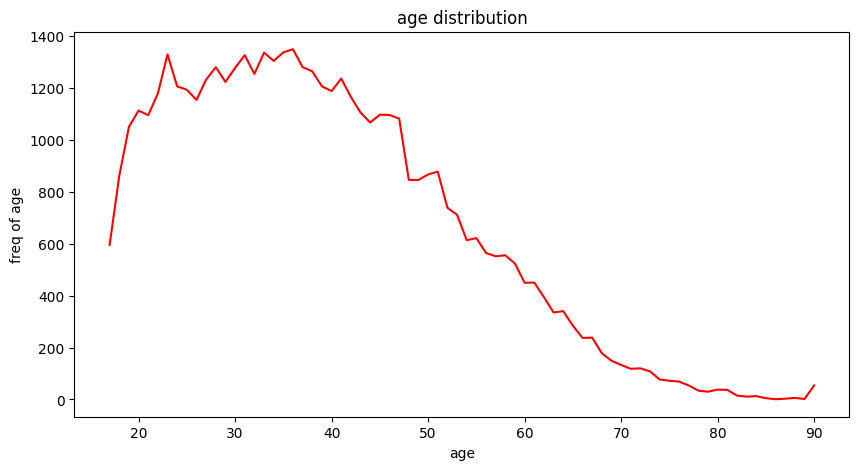

In [196]:
df_age = df['age'].value_counts().sort_index(ascending=False)
df_age.plot.line(figsize=(10,5) , color='red')
# plt.plot(c='red')   #this line make an override on plot
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('freq of age')
plt.show()
# df['age'].value_counts().sort_index(ascending=False).plot(kind="line" , figsize=(10,5))   # this is equal to above line


line chart using plot \
note : sns and pandas are compatible with matplotlib

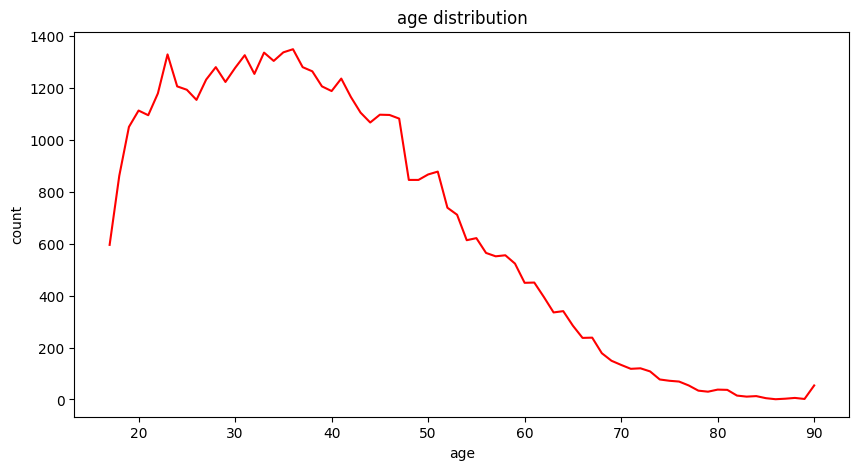

In [197]:

plt.figure(figsize=(10,5))  # u should write this line before all lines about the plot
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('count')
plt.plot(df_age , c='r')  # plt.plot is specific for line chart
plt.show()

line chart using seaborn \
note : plt.plot(c='red')      # u can't use this method for sns or pandas !!!!

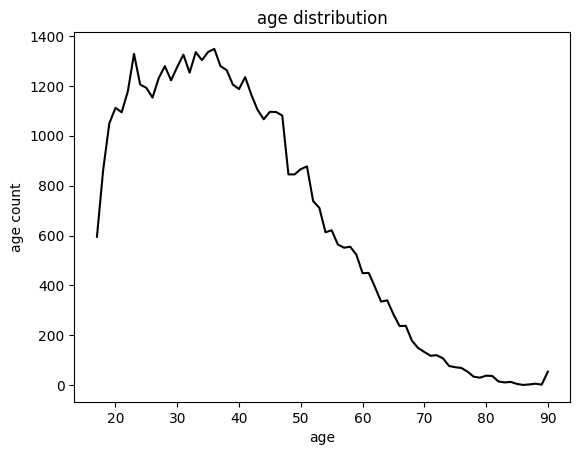

In [198]:
sns.lineplot(df_age , c="black")
# plt.plot(c='red')      # u can't use this method for sns or pandas !!!!
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('age count')
plt.show()

using plotly

In [210]:
fig = px.line(df_age)
fig.update_layout(title='age distribution')
#px.line(df_age , x=df_age.index , y=df_age) u can customize the x and y coordinate content
fig.update_traces(hovertemplate = " <i>Age</i> <br> <b>frequency</b> ")
fig.show()



using bokeh

In [ ]:
#...

## Bar chart     
 \
for discrete datas is very similar to to line chart

bar with matplotlib

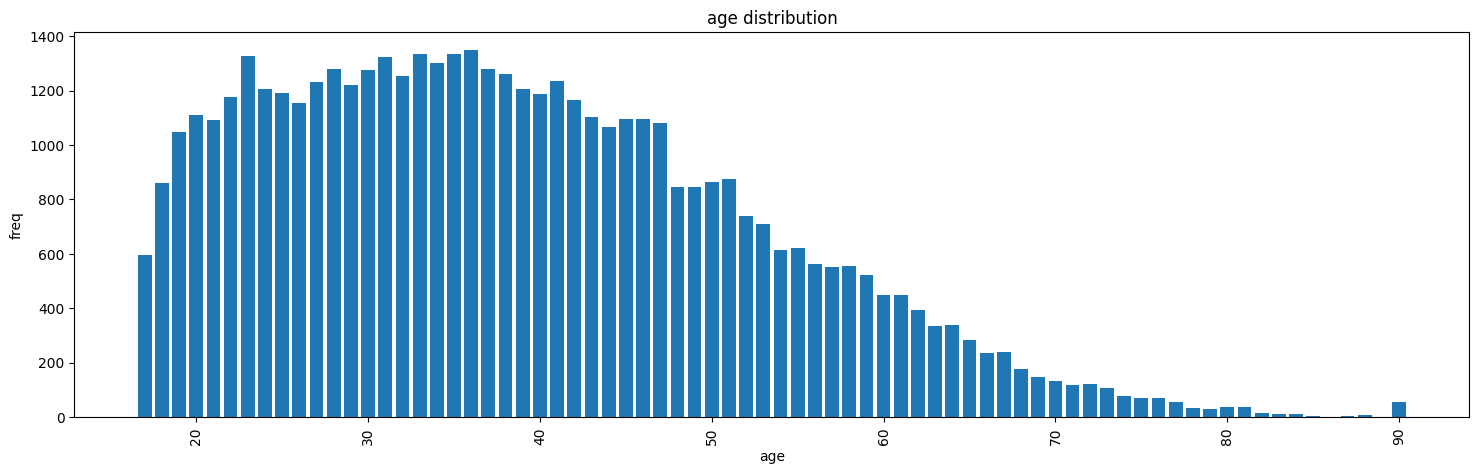

In [244]:
plt.figure(figsize=(18,5))
plt.bar(df_age.index ,df_age.values)
plt.xticks(rotation=90)
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

bar with sns

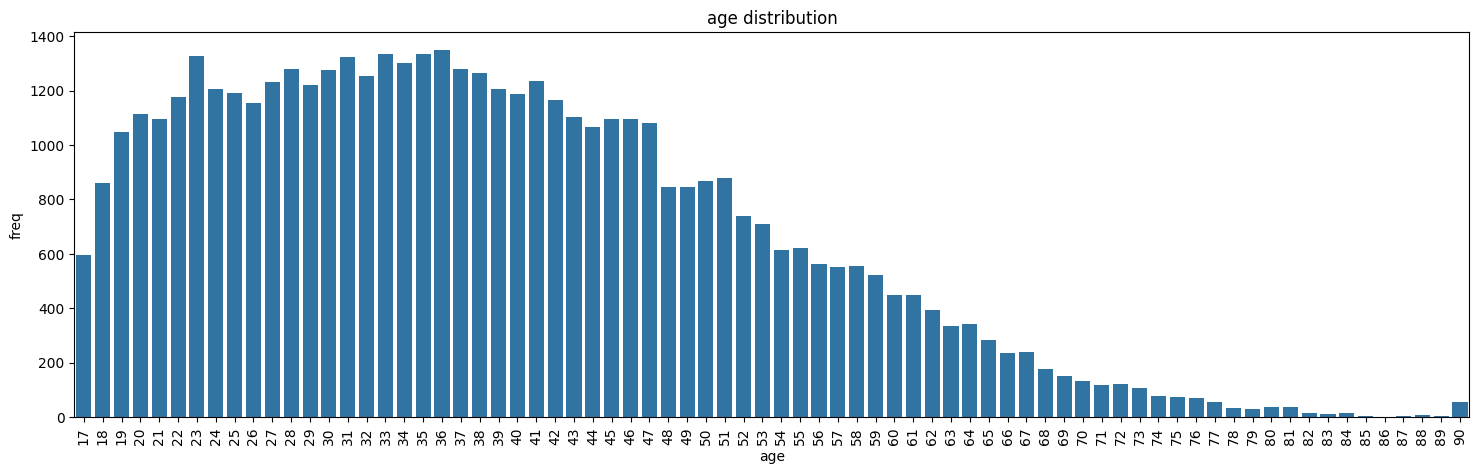

In [234]:
plt.figure(figsize=(18,5))
sns.barplot(df_age)
plt.xticks(rotation=90)
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

bar with pandas

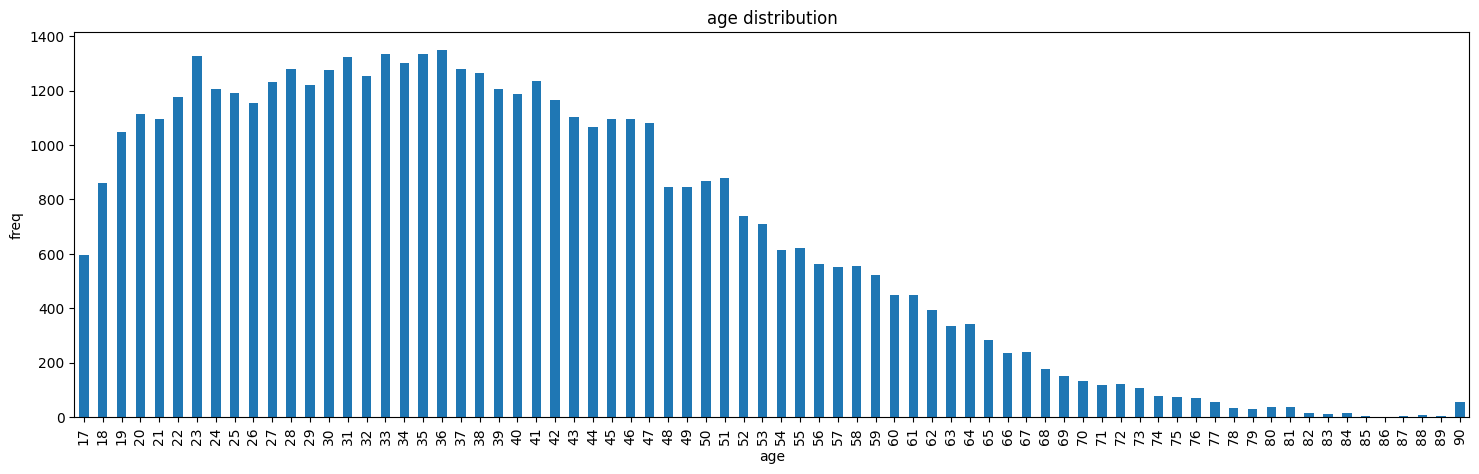

In [248]:
plt.figure(figsize=(18,5))
df_age.sort_index(ascending=True).plot.bar()
plt.xticks(rotation=90)
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('freq')
plt.show()


## Histogram

histogram with bins=1 is equal to bar chart

# pie chart vs bar chart      
\
we have to use pie chart when the unique values is at most 4  \
in bottom cell result of pie chart is not seperable for human , unlike bar chart

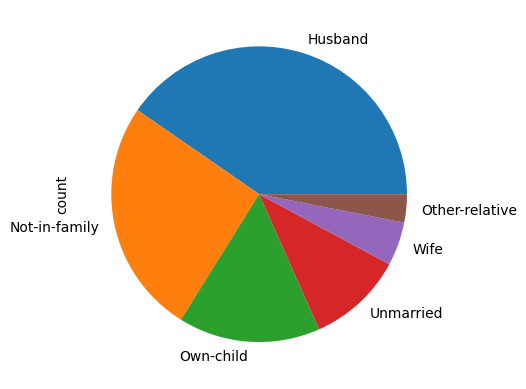

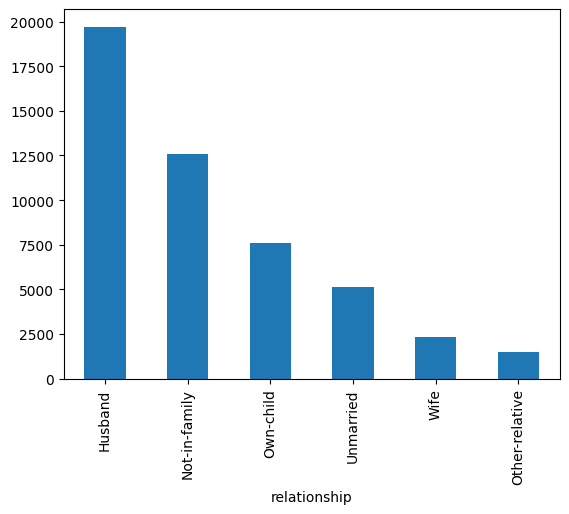

In [271]:
df['relationship'].value_counts().plot(kind='pie')
plt.show()
df['relationship'].value_counts().plot(kind='bar')
plt.show()